In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from src.data_splitting import *
from src.models import *
from src.preprocessing import *
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

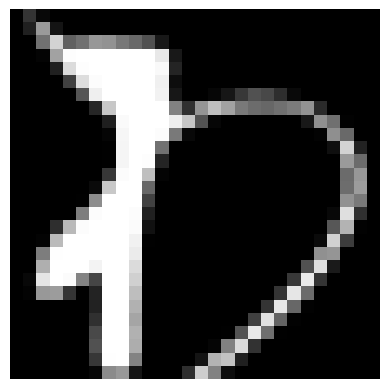

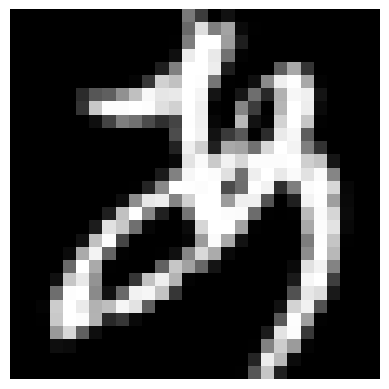

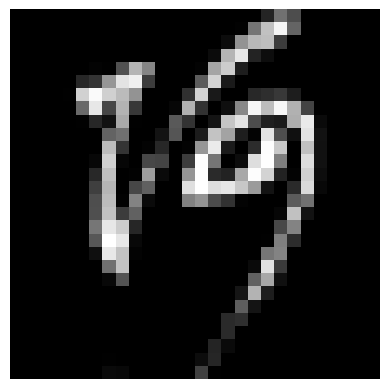

(5000, 784)


In [2]:
X = np.load ("data/X_images.npy")
Y = np.load ("data/y_images.npy")
# X = X / 255
# Y = Y / 255
img1 = X[0].reshape(28 ,28)
img2 = X[1].reshape(28 ,28)
img3 = X[2].reshape(28 ,28)

# Display the image
plt.imshow(img1, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

print(X.shape)

## Data Splitting

In [3]:
X_norm = X / 255
# Y_encoded = one_hot_encode(Y, 49)
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X_norm,Y)
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02352941 0.
 0.         0.4392157  0.8509804  0.23529412 0.00392157 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.01568628 0.         0.5921569
 1.         0.96862745 0.52156866 0.01176471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.05098039 0.7137255  1.         1.
 0.9529412  0.20392157 0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07450981
 0.62352943 0.9529412  0.5921569  0.47843

## M0 train

In [4]:
# hidden_layers = [100,80]
# input_size = X_train.shape[1] # 784
# output_size = 49
# epochs = 100

# x = np.linspace(0, epochs,100)
# print(x)

# m0_NN = NeuralNetwork_M0(input_size, hidden_layers, output_size)

# m0_NN.train(X_train, Y_train, epochs)
# plt.figure(figsize=(10,8))
# plt.plot(x, m0_NN.losses)
# plt.show()



Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

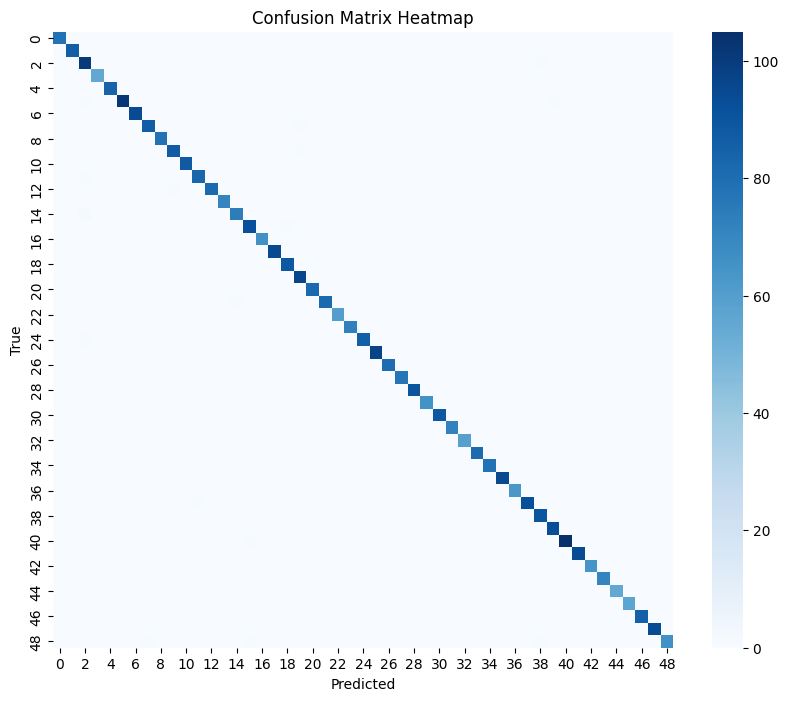


Evaluación en Validation:
Accuracy: 0.6220, Loss: 1.8312


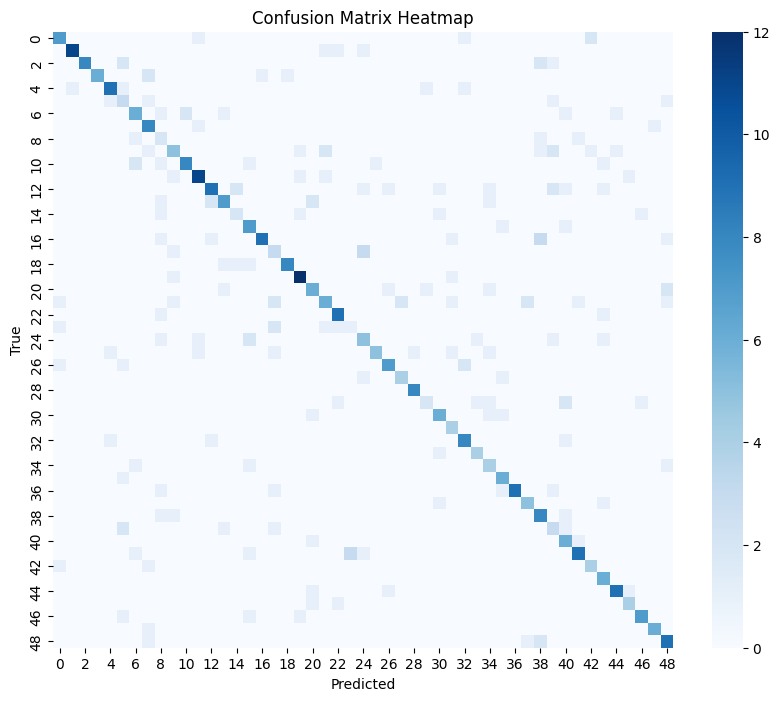

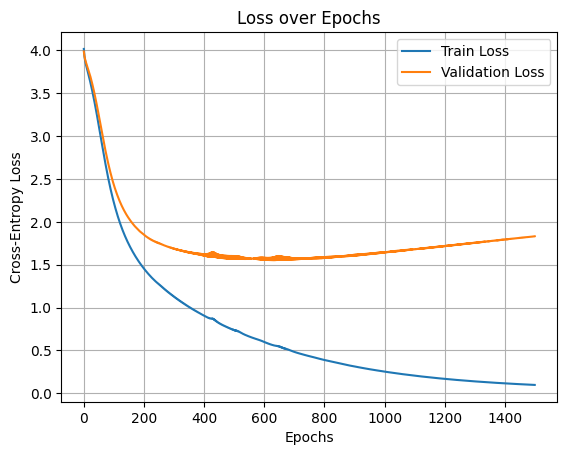

In [5]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)


## Advanced NN

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7922, Val Loss = 3.8286, LR = 0.099333
Epoch 20: Train Loss = 3.6542, Val Loss = 3.7183, LR = 0.098667
Epoch 30: Train Loss = 3.4980, Val Loss = 3.5851, LR = 0.098000
Epoch 40: Train Loss = 3.3228, Val Loss = 3.4280, LR = 0.097333
Epoch 50: Train Loss = 3.1320, Val Loss = 3.2528, LR = 0.096667
Epoch 60: Train Loss = 2.9356, Val Loss = 3.0713, LR = 0.096000
Epoch 70: Train Loss = 2.7437, Val Loss = 2.8932, LR = 0.095333
Epoch 80: Train Loss = 2.5651, Val Loss = 2.7322, LR = 0.094667
Epoch 90: Train Loss = 2.4063, Val Loss = 2.5905, LR = 0.094000
Epoch 100: Train Loss = 2.2669, Val Loss = 2.4673, LR = 0.093333
Epoch 110: Train Loss = 2.1451, Val Loss = 2.3638, LR = 0.092667
Epoch 120: Train Loss = 2.0381, Val Loss = 2.2754, LR = 0.092000
Epoch 130: Train Loss = 1.9441, Val Loss = 2.1996, LR = 0.091333
Epoch 140: Train Loss = 1.8615, Val Loss = 2.1347, LR = 0.090667
Epoch 150: Train Loss = 1.7885, Val 

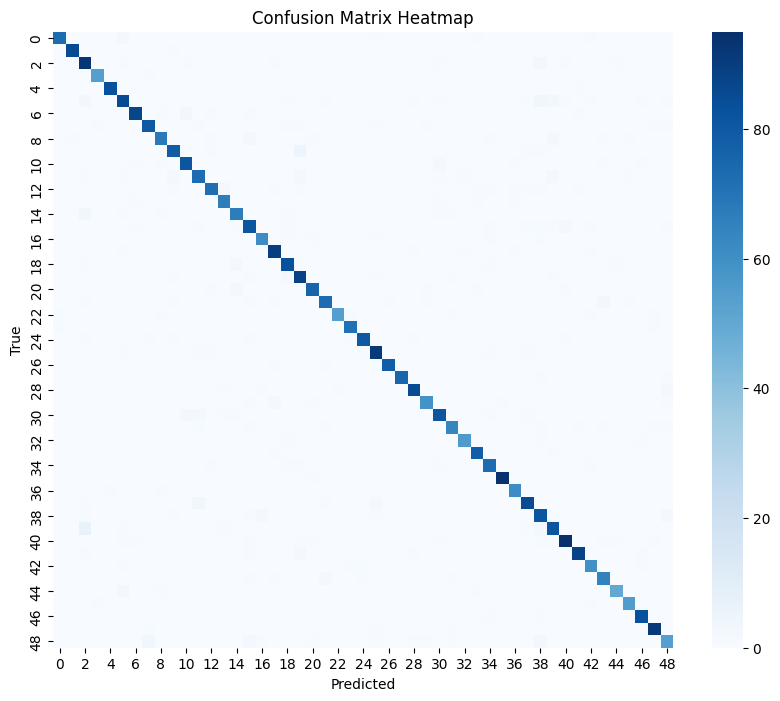


Evaluación en Validation:
Accuracy: 0.6380, Loss: 1.5767


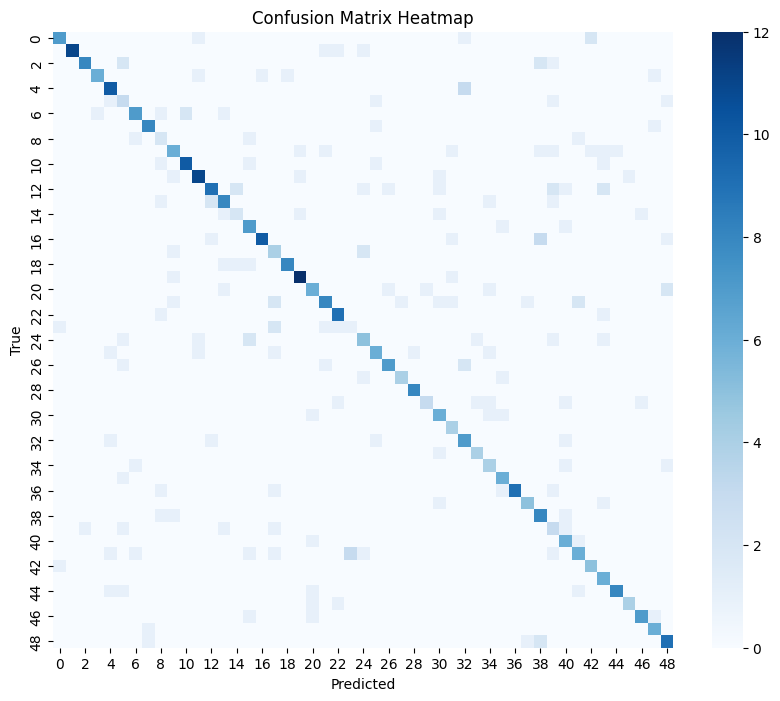

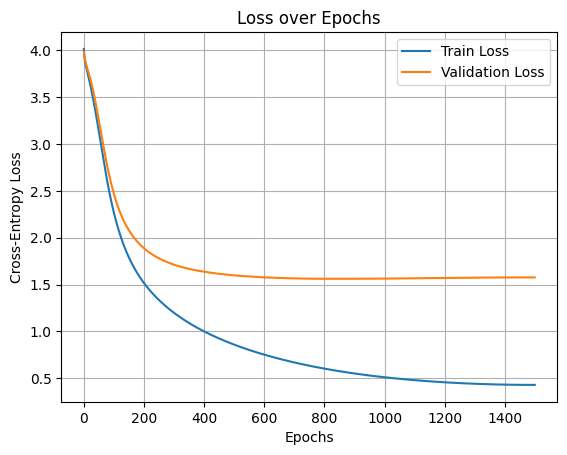

In [6]:
# Rate Scheduling lineal

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="linear")
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.8199, Val Loss = 3.8541, LR = 0.059874
Epoch 20: Train Loss = 3.7532, Val Loss = 3.8047, LR = 0.035849
Epoch 30: Train Loss = 3.7132, Val Loss = 3.7749, LR = 0.021464
Epoch 40: Train Loss = 3.6886, Val Loss = 3.7562, LR = 0.012851
Epoch 50: Train Loss = 3.6736, Val Loss = 3.7449, LR = 0.007694
Epoch 60: Train Loss = 3.6645, Val Loss = 3.7379, LR = 0.004607
Epoch 70: Train Loss = 3.6590, Val Loss = 3.7338, LR = 0.002758
Epoch 80: Train Loss = 3.6558, Val Loss = 3.7313, LR = 0.001652
Epoch 90: Train Loss = 3.6538, Val Loss = 3.7298, LR = 0.000989
Epoch 100: Train Loss = 3.6526, Val Loss = 3.7289, LR = 0.000592
Epoch 110: Train Loss = 3.6519, Val Loss = 3.7283, LR = 0.000354
Epoch 120: Train Loss = 3.6515, Val Loss = 3.7280, LR = 0.000212
Epoch 130: Train Loss = 3.6512, Val Loss = 3.7278, LR = 0.000127
Epoch 140: Train Loss = 3.6511, Val Loss = 3.7277, LR = 0.000076
Epoch 150: Train Loss = 3.6510, Val 

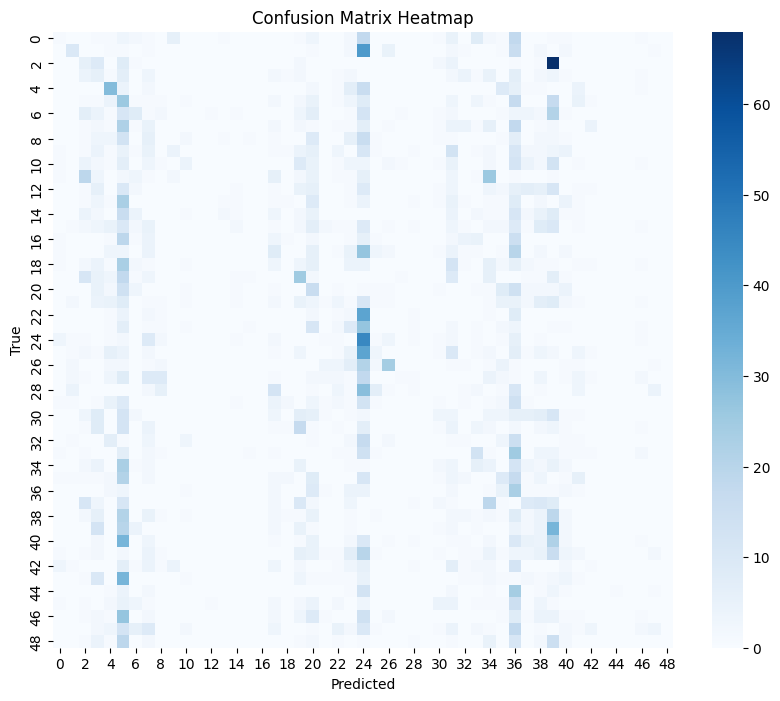


Evaluación en Validation:
Accuracy: 0.0460, Loss: 3.7275


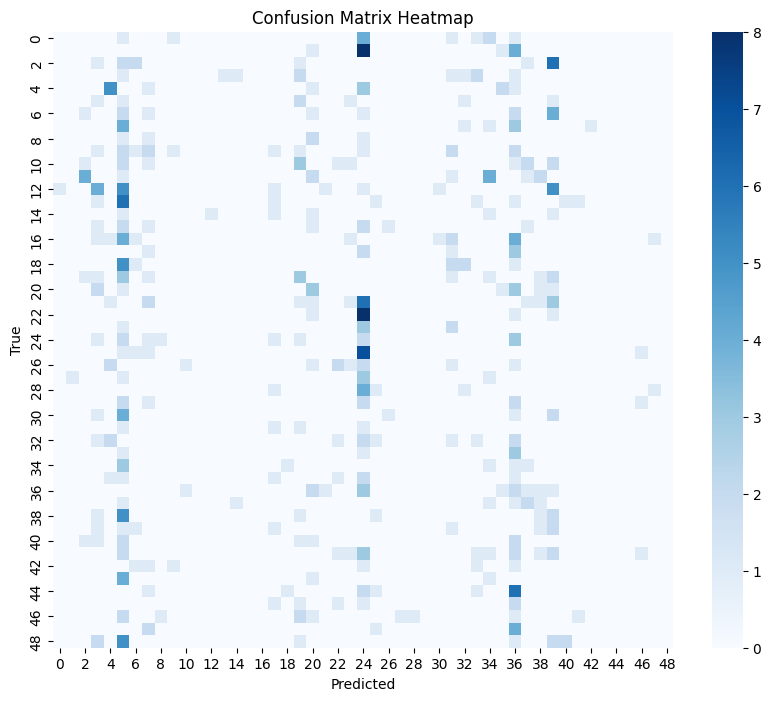

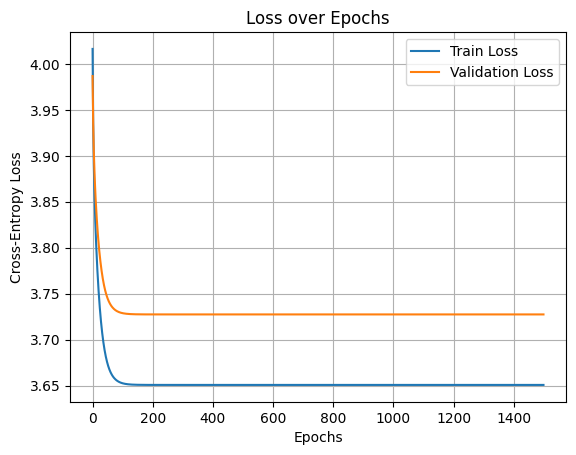

In [7]:
# Rate Scheduling exponential

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="exponential")
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## Mini Batch SGD

Epoch 0: Train Loss = 2.3689, Val Loss = 2.5186, LR = 0.100000
Epoch 10: Train Loss = 0.2415, Val Loss = 1.5768, LR = 0.100000

Tiempo total de entrenamiento: 2.43 segundos
Evaluación en Train:
Accuracy: 0.9998, Loss: 0.0337


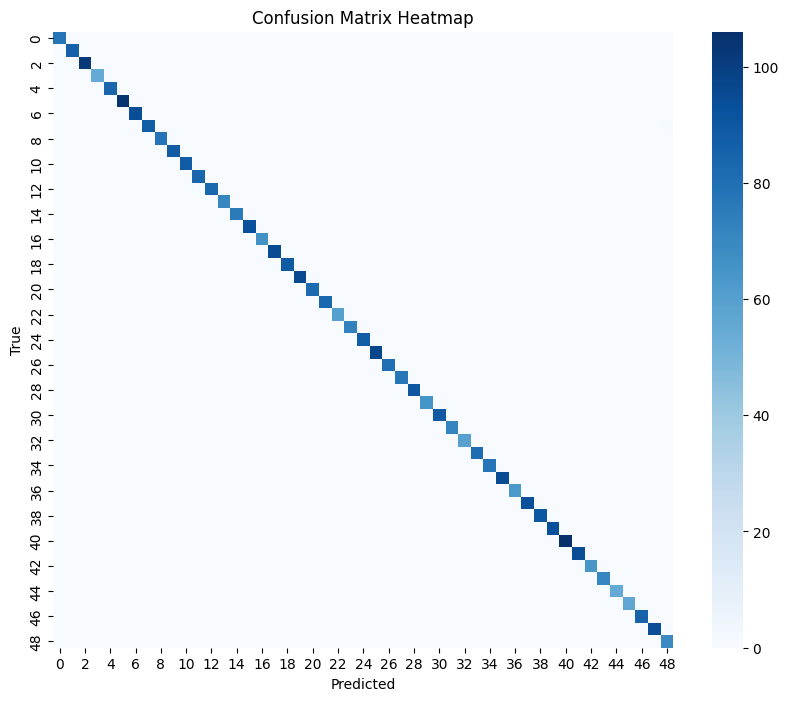


Evaluación en Validation:
Accuracy: 0.6340, Loss: 1.8374


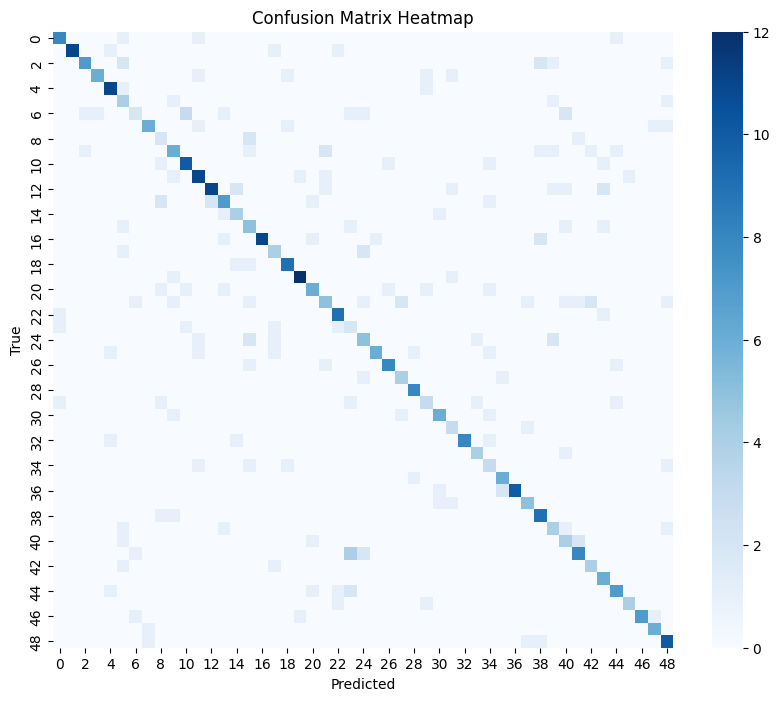

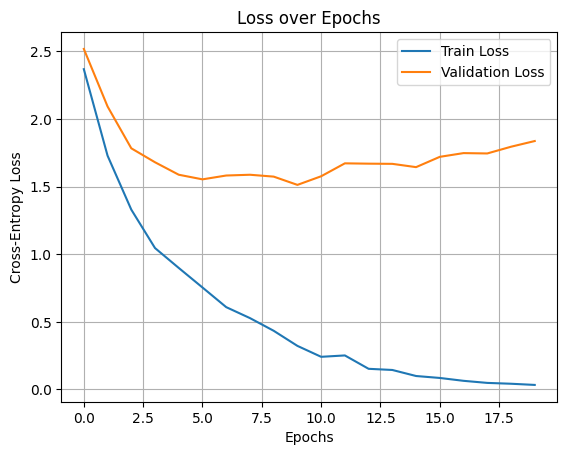

In [8]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, use_mini_batch=True, batch_size=32)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=20)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## ADAM optimizator

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9296, LR = 0.001000
Epoch 10: Train Loss = 3.3877, Val Loss = 3.4467, LR = 0.001000
Epoch 20: Train Loss = 2.7020, Val Loss = 2.8439, LR = 0.001000
Epoch 30: Train Loss = 2.0827, Val Loss = 2.3061, LR = 0.001000
Epoch 40: Train Loss = 1.6423, Val Loss = 2.0084, LR = 0.001000
Epoch 50: Train Loss = 1.3282, Val Loss = 1.8208, LR = 0.001000
Epoch 60: Train Loss = 1.0919, Val Loss = 1.7142, LR = 0.001000
Epoch 70: Train Loss = 0.9047, Val Loss = 1.6497, LR = 0.001000
Epoch 80: Train Loss = 0.7503, Val Loss = 1.6130, LR = 0.001000
Epoch 90: Train Loss = 0.6210, Val Loss = 1.5985, LR = 0.001000
Epoch 100: Train Loss = 0.5127, Val Loss = 1.5983, LR = 0.001000
Epoch 110: Train Loss = 0.4220, Val Loss = 1.6108, LR = 0.001000
Epoch 120: Train Loss = 0.3461, Val Loss = 1.6290, LR = 0.001000
Epoch 130: Train Loss = 0.2824, Val Loss = 1.6526, LR = 0.001000
Epoch 140: Train Loss = 0.2298, Val Loss = 1.6797, LR = 0.001000
Epoch 150: Train Loss = 0.1870, Val 

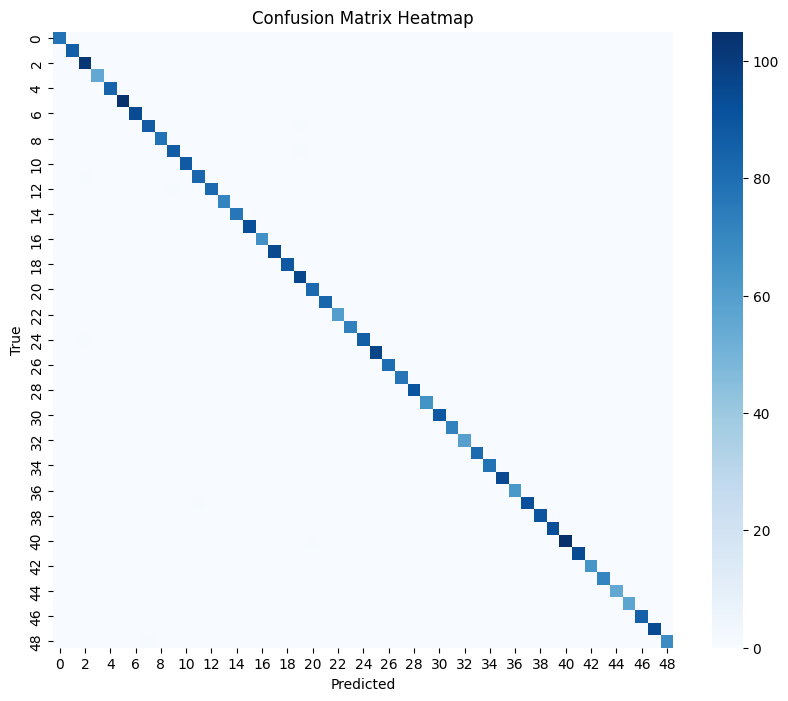


Evaluación en Validation:
Accuracy: 0.6260, Loss: 1.8856


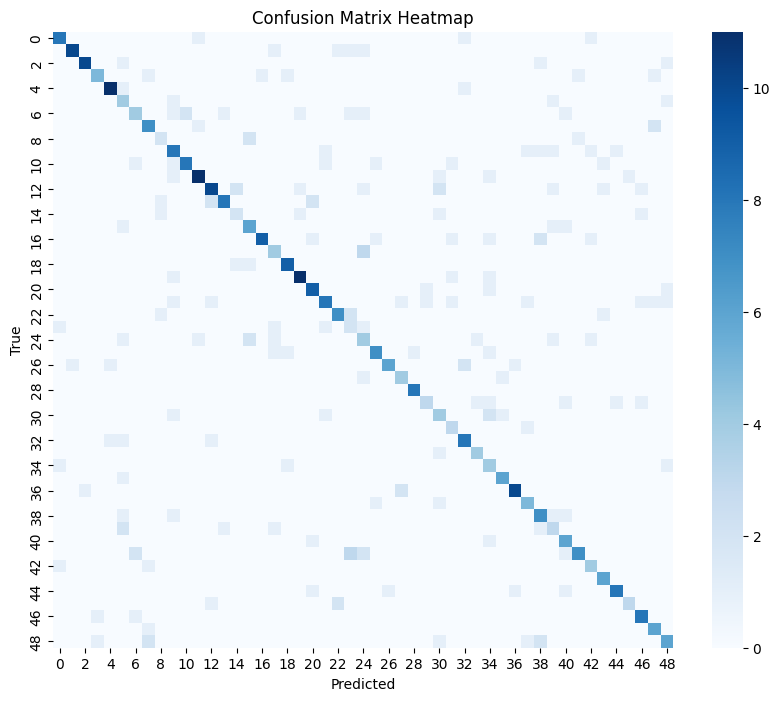

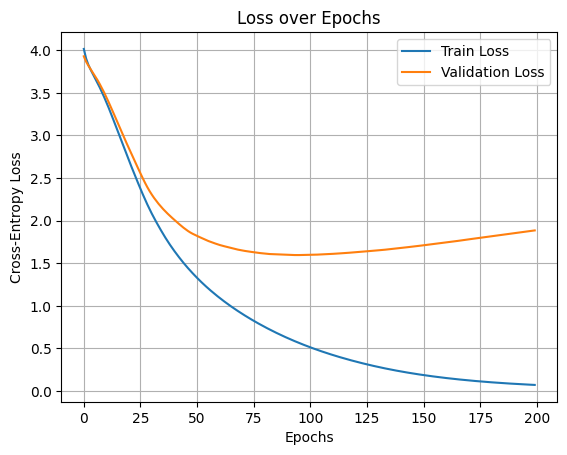

In [9]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, optimizer='adam')
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=200)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## Regularizacion L2

Epoch 0: Train Loss = 4.0732, Val Loss = 4.4428, LR = 0.100000
Epoch 10: Train Loss = 3.8488, Val Loss = 4.2838, LR = 0.100000
Epoch 20: Train Loss = 3.7095, Val Loss = 4.1726, LR = 0.100000
Epoch 30: Train Loss = 3.5508, Val Loss = 4.0378, LR = 0.100000
Epoch 40: Train Loss = 3.3713, Val Loss = 3.8778, LR = 0.100000
Epoch 50: Train Loss = 3.1746, Val Loss = 3.6990, LR = 0.100000
Epoch 60: Train Loss = 2.9719, Val Loss = 3.5133, LR = 0.100000
Epoch 70: Train Loss = 2.7735, Val Loss = 3.3329, LR = 0.100000
Epoch 80: Train Loss = 2.5900, Val Loss = 3.1707, LR = 0.100000
Epoch 90: Train Loss = 2.4275, Val Loss = 3.0293, LR = 0.100000
Epoch 100: Train Loss = 2.2853, Val Loss = 2.9079, LR = 0.100000
Epoch 110: Train Loss = 2.1610, Val Loss = 2.8069, LR = 0.100000
Epoch 120: Train Loss = 2.0524, Val Loss = 2.7208, LR = 0.100000
Epoch 130: Train Loss = 1.9573, Val Loss = 2.6482, LR = 0.100000
Epoch 140: Train Loss = 1.8739, Val Loss = 2.5863, LR = 0.100000
Epoch 150: Train Loss = 1.7998, Val 

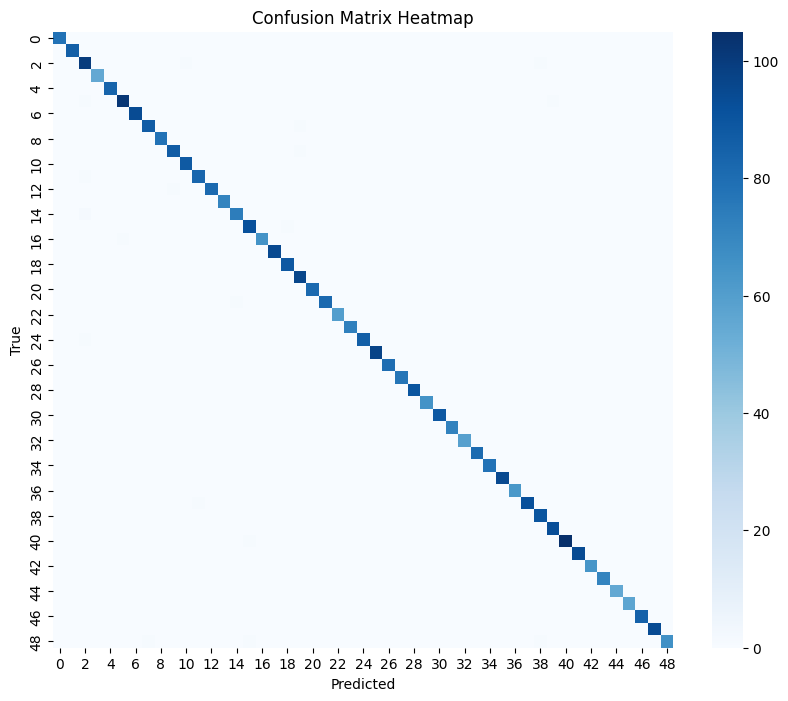


Evaluación en Validation:
Accuracy: 0.6280, Loss: 2.5588


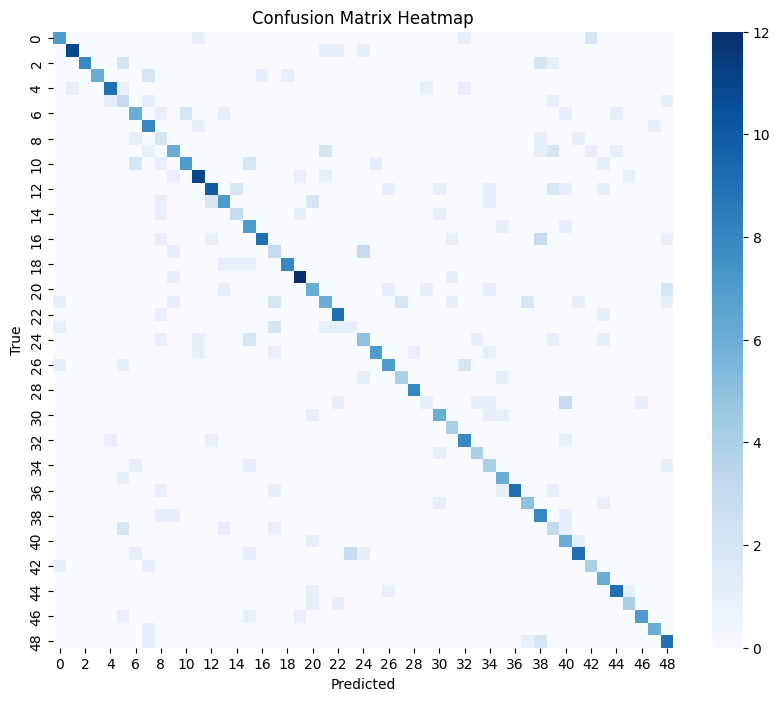

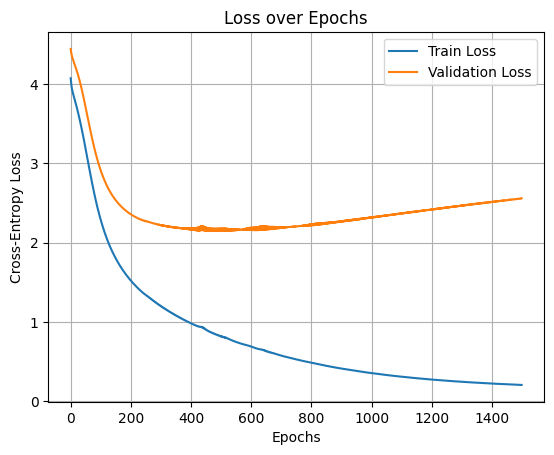

In [10]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, l2_lambda=1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)
# Accuracy: 0.6340, Loss: 1.9140

## Early Stopping

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

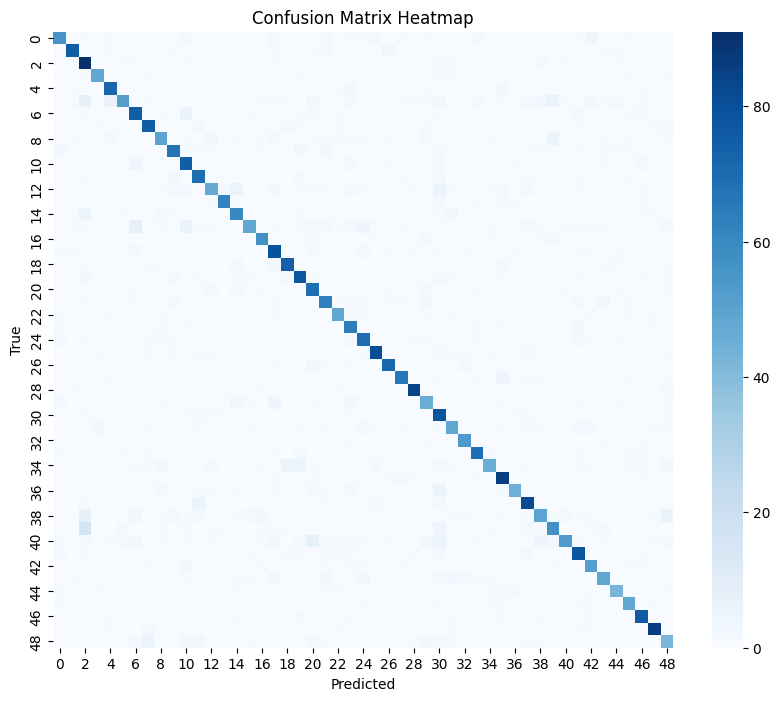


Evaluación en Validation:
Accuracy: 0.5980, Loss: 1.5952


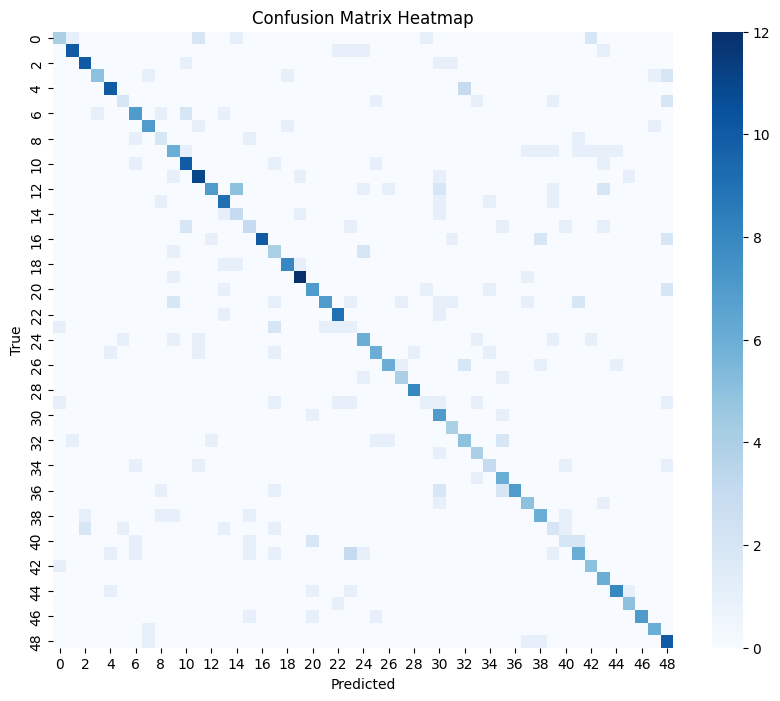

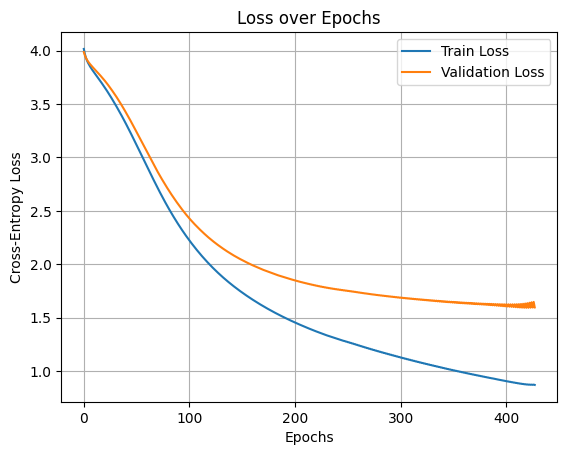

In [11]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500,early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## M1

Epoch 0: Train Loss = 2.1198, Val Loss = 2.3450, LR = 0.001000
Epoch 10: Train Loss = 0.0861, Val Loss = 1.5177, LR = 0.000599

Early stopping at epoch 16 (no improvement in 10 epochs).

Tiempo total de entrenamiento: 13.60 segundos
Evaluación en Train:
Accuracy: 0.9995, Loss: 0.0297


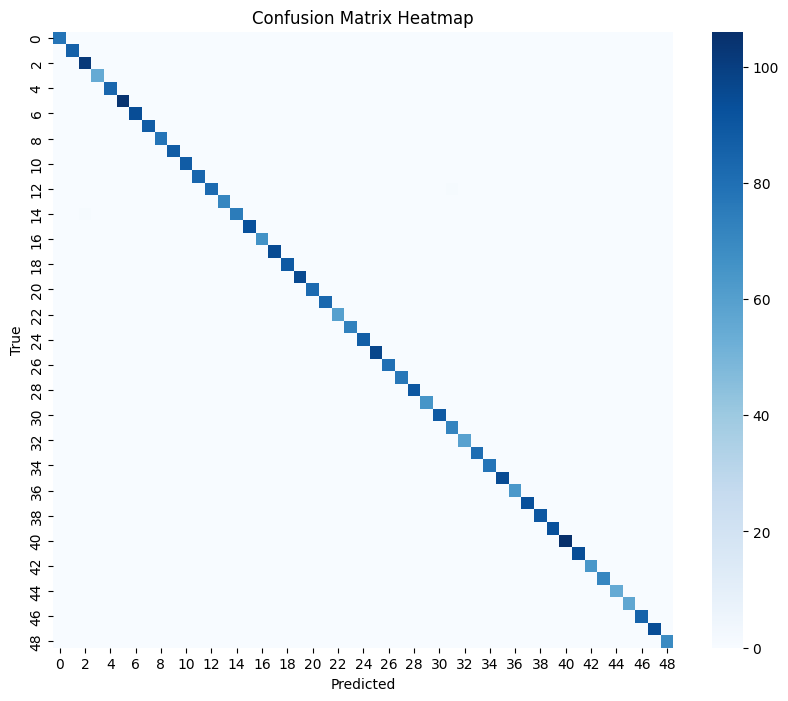


Evaluación en Validation:
Accuracy: 0.6840, Loss: 1.6010


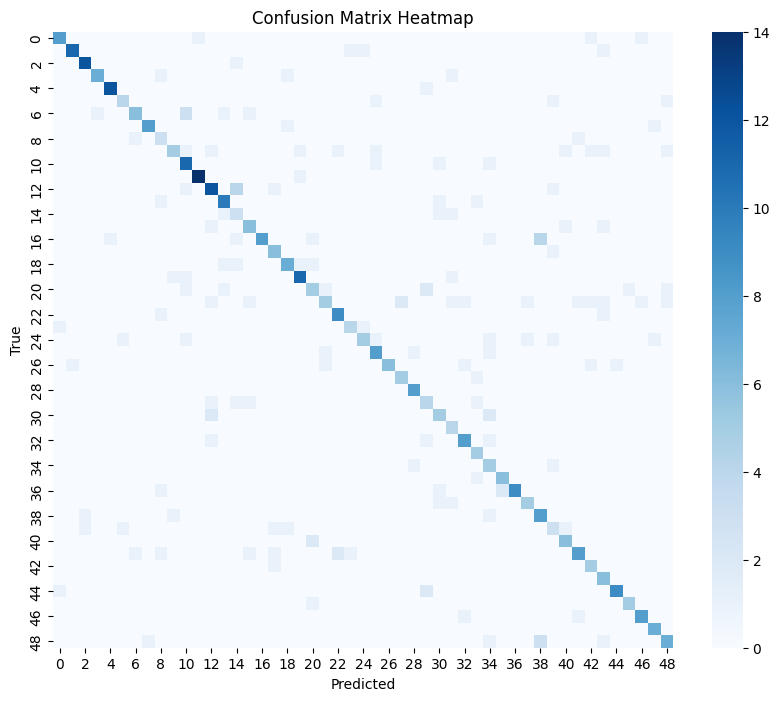

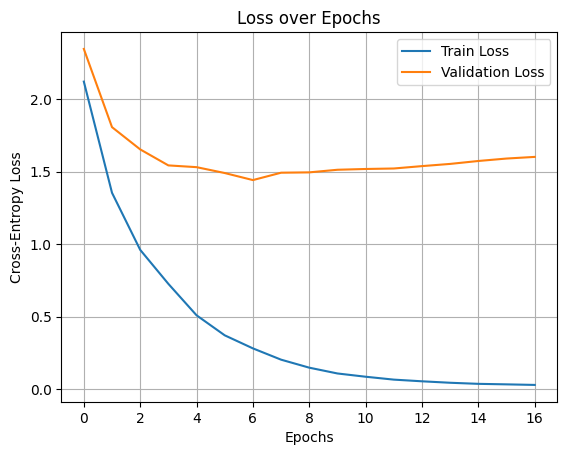

In [12]:
nn = NeuralNetwork(layer_dims=[784, 400, 100, 80, 49], learning_rate=0.001,schedule='exponential',optimizer='adam',use_mini_batch=True,l2_lambda=0.01,batch_size=64)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=300, early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)
# Accuracy: 0.7160, Loss: 1.9041

## 4


## M2

Epoch 1: Train Loss=3.7688, Acc=0.0583 | Val Loss=3.4409, Acc=0.0920 | LR=0.000950
Epoch 2: Train Loss=3.2095, Acc=0.1502 | Val Loss=2.9711, Acc=0.1840 | LR=0.000902
Epoch 3: Train Loss=2.8459, Acc=0.2330 | Val Loss=2.6980, Acc=0.2560 | LR=0.000857
Epoch 4: Train Loss=2.5377, Acc=0.3275 | Val Loss=2.5898, Acc=0.2920 | LR=0.000815
Epoch 5: Train Loss=2.3694, Acc=0.3640 | Val Loss=2.3912, Acc=0.3580 | LR=0.000774
Epoch 6: Train Loss=2.2562, Acc=0.3967 | Val Loss=2.3284, Acc=0.3780 | LR=0.000735
Epoch 7: Train Loss=2.1552, Acc=0.4265 | Val Loss=2.3165, Acc=0.3780 | LR=0.000698
Epoch 8: Train Loss=2.1043, Acc=0.4370 | Val Loss=2.2167, Acc=0.4180 | LR=0.000663
Epoch 9: Train Loss=2.0082, Acc=0.4617 | Val Loss=2.2268, Acc=0.4280 | LR=0.000630
Epoch 10: Train Loss=1.9432, Acc=0.4855 | Val Loss=2.1393, Acc=0.4380 | LR=0.000599
Epoch 11: Train Loss=1.8747, Acc=0.5045 | Val Loss=2.1323, Acc=0.4500 | LR=0.000569
Epoch 12: Train Loss=1.8329, Acc=0.5092 | Val Loss=2.0601, Acc=0.4520 | LR=0.000540
E

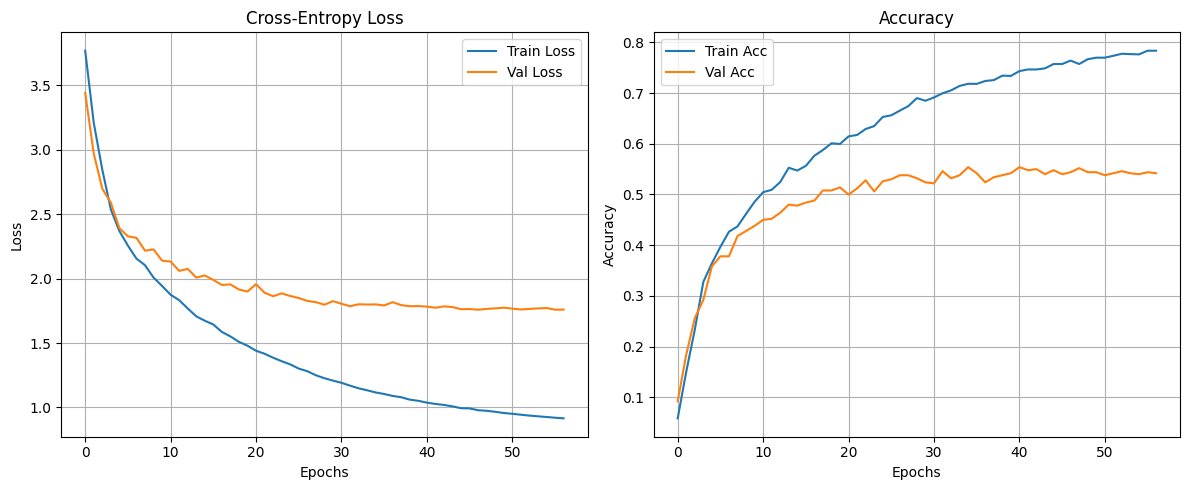

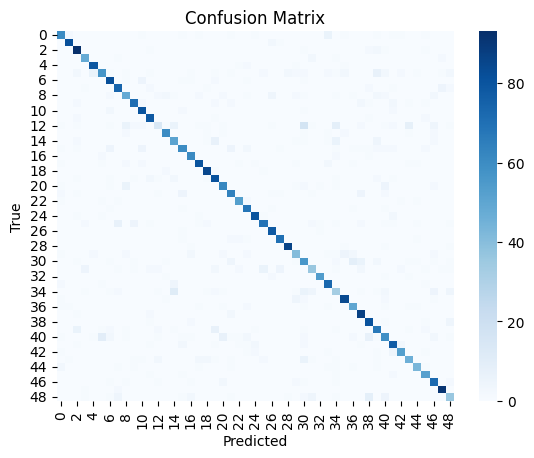

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

input_dim = 784
hidden_dims = [400, 100, 80]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

## M3

Epoch 1: Train Loss=2.6707, Acc=0.3738 | Val Loss=2.0190, Acc=0.5100 | LR=0.000950
Epoch 2: Train Loss=1.8158, Acc=0.5587 | Val Loss=1.8123, Acc=0.5640 | LR=0.000902
Epoch 3: Train Loss=1.6135, Acc=0.6065 | Val Loss=1.7119, Acc=0.5720 | LR=0.000857
Epoch 4: Train Loss=1.5113, Acc=0.6410 | Val Loss=1.6552, Acc=0.6200 | LR=0.000815
Epoch 5: Train Loss=1.4445, Acc=0.6455 | Val Loss=1.6313, Acc=0.6080 | LR=0.000774
Epoch 6: Train Loss=1.3875, Acc=0.6613 | Val Loss=1.6529, Acc=0.5940 | LR=0.000735
Epoch 7: Train Loss=1.3222, Acc=0.6825 | Val Loss=1.5597, Acc=0.6040 | LR=0.000698
Epoch 8: Train Loss=1.2869, Acc=0.6990 | Val Loss=1.5816, Acc=0.6260 | LR=0.000663
Epoch 9: Train Loss=1.2544, Acc=0.7003 | Val Loss=1.5600, Acc=0.6340 | LR=0.000630
Epoch 10: Train Loss=1.2204, Acc=0.7107 | Val Loss=1.5078, Acc=0.6400 | LR=0.000599
Epoch 11: Train Loss=1.1844, Acc=0.7295 | Val Loss=1.5427, Acc=0.6420 | LR=0.000569
Epoch 12: Train Loss=1.1537, Acc=0.7352 | Val Loss=1.5216, Acc=0.6340 | LR=0.000540
E

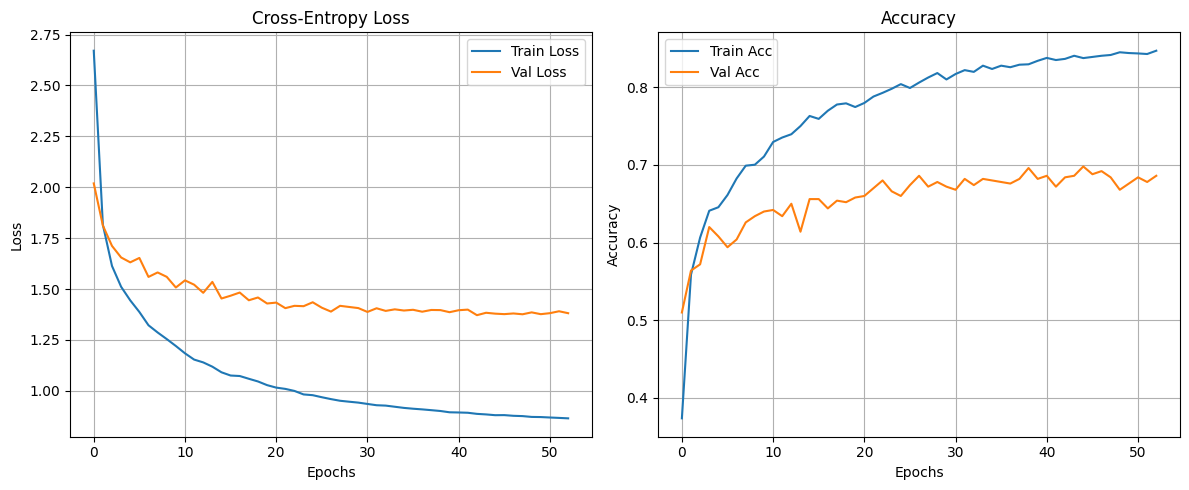

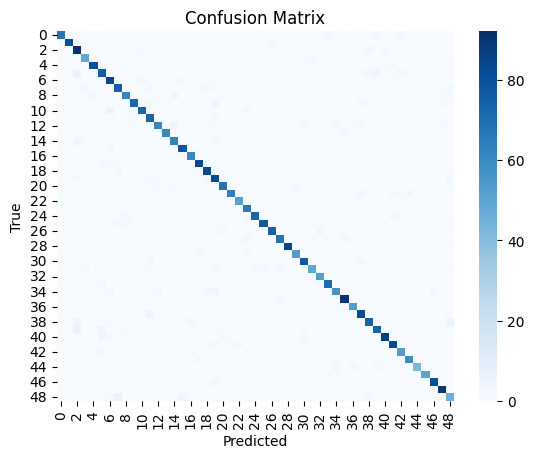

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Prepare your data (assumes X_train, Y_train, X_val, Y_val are numpy arrays)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, Y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, Y_val_tensor), batch_size=64)

# Mejor {400,200,80}
# Aun mejor {200, 80}
#Mas mejor {200,100}
# Mas mas mejor {400}
#menos capas es mejor
# {1000}
# mas nodos es mejor tambien
#{2000}
#{2000,1000}

input_dim = 784
hidden_dims = [2000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

## M4

Epoch 1: Train Loss=3.5649, Acc=0.0665 | Val Loss=3.2705, Acc=0.1140 | LR=0.000950
Epoch 2: Train Loss=2.9789, Acc=0.1727 | Val Loss=2.8275, Acc=0.2000 | LR=0.000902
Epoch 3: Train Loss=2.6354, Acc=0.2550 | Val Loss=2.6159, Acc=0.2540 | LR=0.000857
Epoch 4: Train Loss=2.4479, Acc=0.3055 | Val Loss=2.4703, Acc=0.3420 | LR=0.000815
Epoch 5: Train Loss=2.2347, Acc=0.3860 | Val Loss=2.3130, Acc=0.3800 | LR=0.000774
Epoch 6: Train Loss=2.1075, Acc=0.4125 | Val Loss=2.2964, Acc=0.3760 | LR=0.000735
Epoch 7: Train Loss=1.9920, Acc=0.4592 | Val Loss=2.1430, Acc=0.4420 | LR=0.000698
Epoch 8: Train Loss=1.8377, Acc=0.4918 | Val Loss=2.0969, Acc=0.4460 | LR=0.000663
Epoch 9: Train Loss=1.7484, Acc=0.5145 | Val Loss=2.0531, Acc=0.4440 | LR=0.000630
Epoch 10: Train Loss=1.6363, Acc=0.5477 | Val Loss=1.9992, Acc=0.4580 | LR=0.000599
Epoch 11: Train Loss=1.5646, Acc=0.5640 | Val Loss=2.0579, Acc=0.4680 | LR=0.000569
Epoch 12: Train Loss=1.5013, Acc=0.5885 | Val Loss=1.9442, Acc=0.4740 | LR=0.000540
E

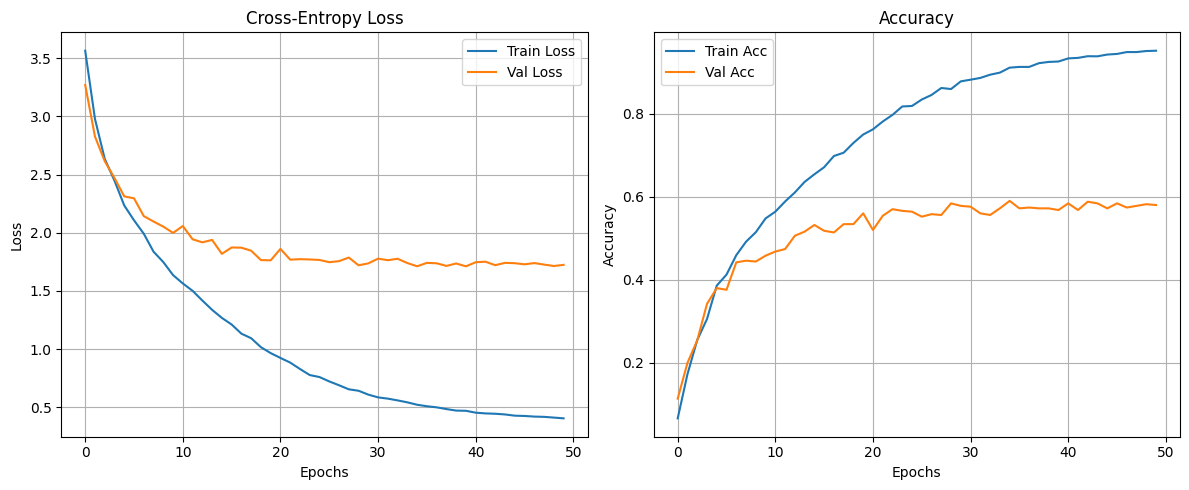

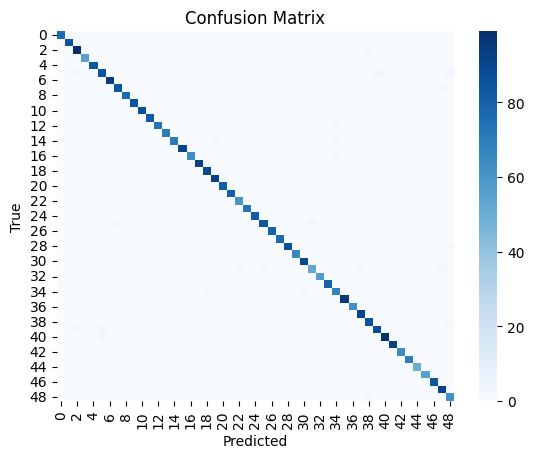

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Prepare your data (assumes X_train, Y_train, X_val, Y_val are numpy arrays)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, Y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, Y_val_tensor), batch_size=64)

# No lo logre con muchas capas y alta cantidad de nodos
# {1000,1000,1000}

input_dim = 784
hidden_dims = [1000,1000,1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

## Test

## M0

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

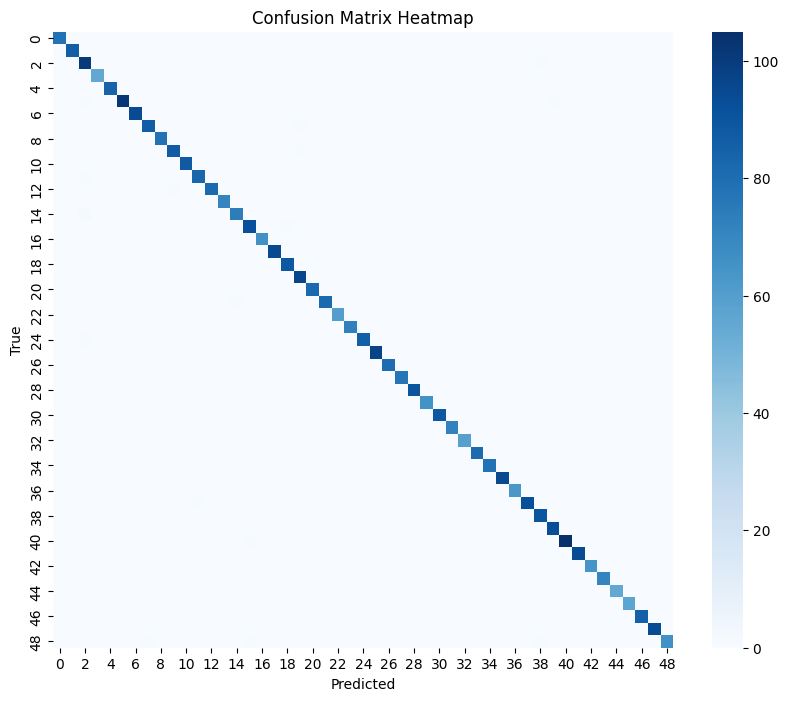


Evaluación en Validation:
Accuracy: 0.6500, Loss: 1.8968


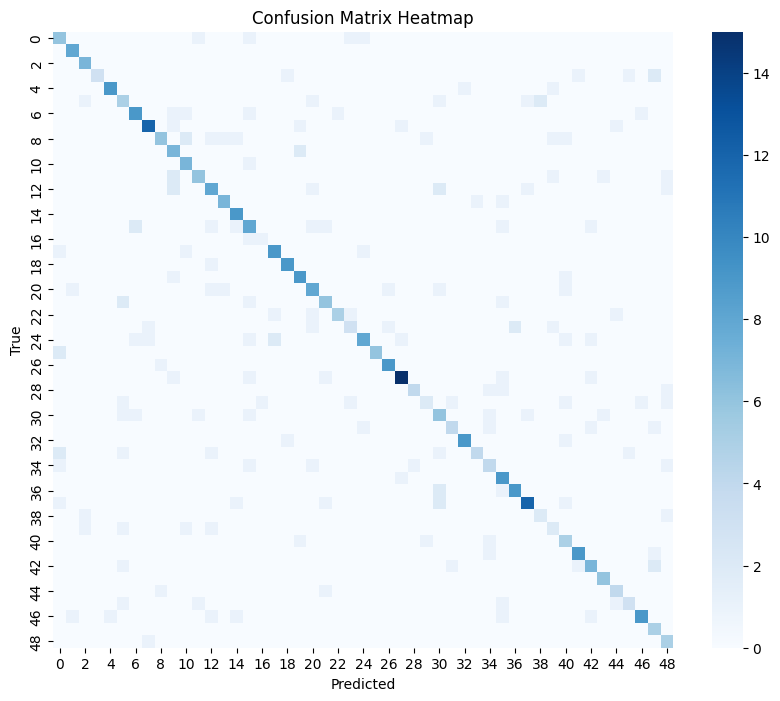

In [ ]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Test:")
acc_test_M0, loss_test_M0, conf_test_M0 = nn.evaluate(X_test, Y_test)
print(f"Accuracy: {acc_test_M0:.4f}, Loss: {loss_test_M0:.4f}")
nn.plot_confusion_matrix(conf_test_M0)


## M1

Epoch 0: Train Loss = 2.1198, Val Loss = 2.3450, LR = 0.001000
Epoch 10: Train Loss = 0.0861, Val Loss = 1.5177, LR = 0.000599

Early stopping at epoch 16 (no improvement in 10 epochs).

Tiempo total de entrenamiento: 13.32 segundos
Evaluación en Train:
Accuracy: 0.9995, Loss: 0.0297


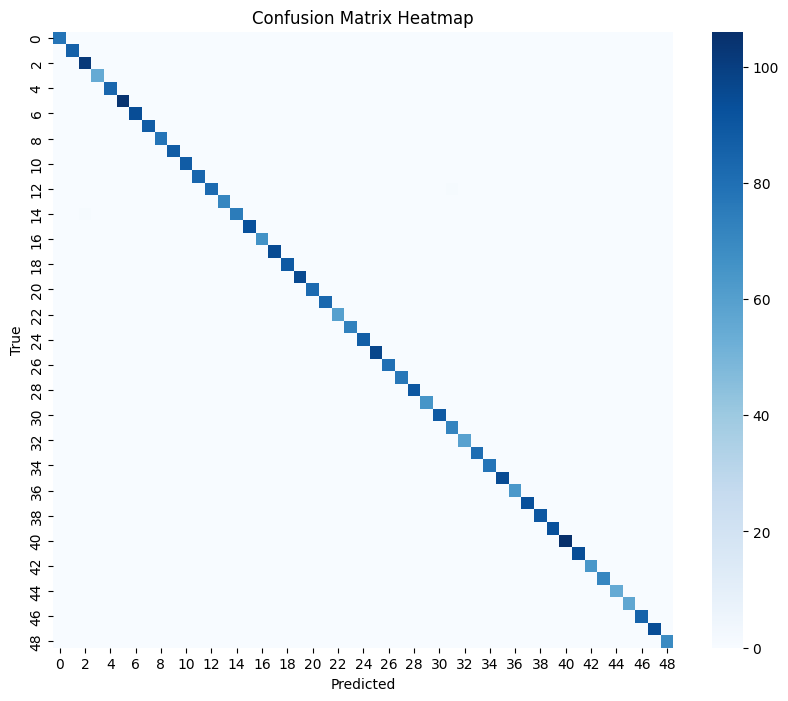


Evaluación en Test:
Accuracy: 0.6900, Loss: 1.6018


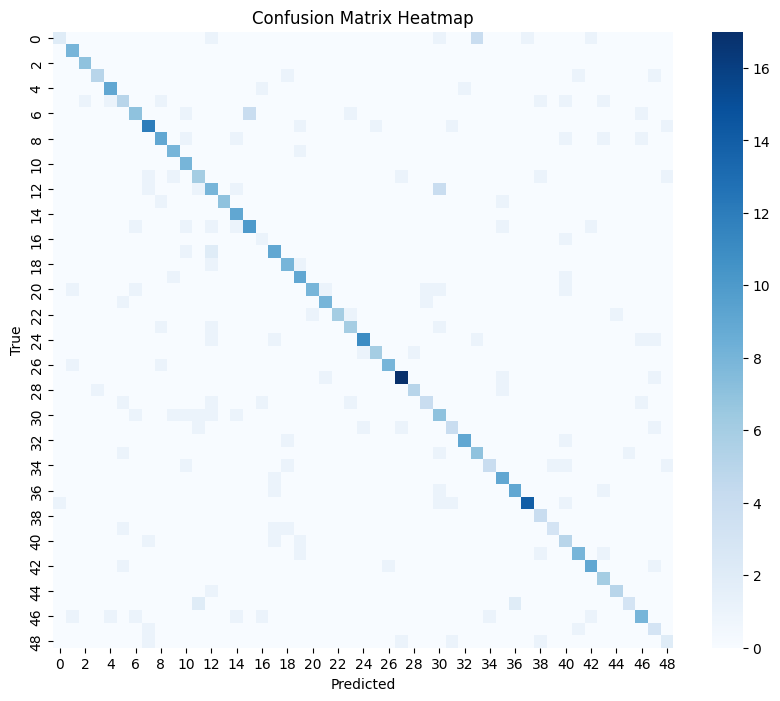

In [46]:
nn = NeuralNetwork(layer_dims=[784, 400, 100, 80, 49], learning_rate=0.001,schedule='exponential',optimizer='adam',use_mini_batch=True,l2_lambda=0.01,batch_size=64)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=300, early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Test:")
acc_test_M1, loss_test_M1, conf_test_M1 = nn.evaluate(X_test, Y_test)
print(f"Accuracy: {acc_test_M1:.4f}, Loss: {loss_test_M1:.4f}")
nn.plot_confusion_matrix(conf_test_M1)

## M2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [400, 100, 80]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decays

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M2, acc_test_M2 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M2:.4f}, Test Accuracy: {acc_test_M2:.4f}")

Epoch 1: Train Loss=3.7603, Acc=0.0478 | Val Loss=3.4620, Acc=0.0820 | LR=0.000950
Epoch 2: Train Loss=3.2134, Acc=0.1365 | Val Loss=3.0371, Acc=0.1580 | LR=0.000902
Epoch 3: Train Loss=2.8993, Acc=0.2062 | Val Loss=2.8957, Acc=0.2200 | LR=0.000857
Epoch 4: Train Loss=2.6851, Acc=0.2705 | Val Loss=2.6531, Acc=0.3060 | LR=0.000815
Epoch 5: Train Loss=2.5187, Acc=0.3230 | Val Loss=2.5140, Acc=0.3220 | LR=0.000774
Epoch 6: Train Loss=2.3908, Acc=0.3545 | Val Loss=2.4203, Acc=0.3520 | LR=0.000735
Epoch 7: Train Loss=2.2873, Acc=0.3790 | Val Loss=2.3240, Acc=0.3920 | LR=0.000698
Epoch 8: Train Loss=2.1818, Acc=0.4145 | Val Loss=2.2925, Acc=0.3860 | LR=0.000663
Epoch 9: Train Loss=2.1043, Acc=0.4330 | Val Loss=2.2323, Acc=0.4100 | LR=0.000630
Epoch 10: Train Loss=2.0290, Acc=0.4615 | Val Loss=2.1651, Acc=0.4140 | LR=0.000599
Epoch 11: Train Loss=1.9686, Acc=0.4698 | Val Loss=2.0982, Acc=0.4500 | LR=0.000569
Epoch 12: Train Loss=1.8939, Acc=0.4983 | Val Loss=2.0399, Acc=0.4540 | LR=0.000540
E

## M3

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [2000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M3, acc_test_M3 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M3:.4f}, Test Accuracy: {acc_test_M3:.4f}")

Epoch 1: Train Loss=2.9407, Acc=0.2595 | Val Loss=2.3027, Acc=0.3880 | LR=0.000950
Epoch 2: Train Loss=2.0784, Acc=0.4760 | Val Loss=1.9481, Acc=0.5140 | LR=0.000902
Epoch 3: Train Loss=1.7920, Acc=0.5433 | Val Loss=1.8383, Acc=0.5320 | LR=0.000857
Epoch 4: Train Loss=1.6729, Acc=0.5643 | Val Loss=1.7865, Acc=0.5340 | LR=0.000815
Epoch 5: Train Loss=1.5781, Acc=0.5915 | Val Loss=1.7470, Acc=0.5620 | LR=0.000774
Epoch 6: Train Loss=1.4858, Acc=0.6160 | Val Loss=1.6691, Acc=0.5740 | LR=0.000735
Epoch 7: Train Loss=1.4134, Acc=0.6352 | Val Loss=1.6495, Acc=0.5880 | LR=0.000698
Epoch 8: Train Loss=1.3560, Acc=0.6505 | Val Loss=1.5914, Acc=0.6080 | LR=0.000663
Epoch 9: Train Loss=1.2879, Acc=0.6773 | Val Loss=1.5959, Acc=0.6080 | LR=0.000630
Epoch 10: Train Loss=1.2613, Acc=0.6685 | Val Loss=1.5754, Acc=0.5980 | LR=0.000599
Epoch 11: Train Loss=1.2209, Acc=0.6847 | Val Loss=1.5458, Acc=0.6280 | LR=0.000569
Epoch 12: Train Loss=1.1806, Acc=0.6997 | Val Loss=1.5046, Acc=0.6360 | LR=0.000540
E

## M4

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [1000, 1000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M4, acc_test_M4 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M4:.4f}, Test Accuracy: {acc_test_M4:.4f}")

Epoch 1: Train Loss=3.5822, Acc=0.0590 | Val Loss=3.2646, Acc=0.0900 | LR=0.000950
Epoch 2: Train Loss=3.1356, Acc=0.1265 | Val Loss=2.9956, Acc=0.1360 | LR=0.000902
Epoch 3: Train Loss=2.8987, Acc=0.1700 | Val Loss=2.8514, Acc=0.2020 | LR=0.000857
Epoch 4: Train Loss=2.6526, Acc=0.2492 | Val Loss=2.5859, Acc=0.2960 | LR=0.000815
Epoch 5: Train Loss=2.3974, Acc=0.3245 | Val Loss=2.4188, Acc=0.3460 | LR=0.000774
Epoch 6: Train Loss=2.2028, Acc=0.3748 | Val Loss=2.2591, Acc=0.3820 | LR=0.000735
Epoch 7: Train Loss=2.0441, Acc=0.4263 | Val Loss=2.1499, Acc=0.4040 | LR=0.000698
Epoch 8: Train Loss=1.8964, Acc=0.4753 | Val Loss=2.0959, Acc=0.4360 | LR=0.000663
Epoch 9: Train Loss=1.7856, Acc=0.5032 | Val Loss=2.0348, Acc=0.4460 | LR=0.000630
Epoch 10: Train Loss=1.6921, Acc=0.5270 | Val Loss=2.0076, Acc=0.4580 | LR=0.000599
Epoch 11: Train Loss=1.5919, Acc=0.5570 | Val Loss=1.9702, Acc=0.4800 | LR=0.000569
Epoch 12: Train Loss=1.5070, Acc=0.5780 | Val Loss=1.8971, Acc=0.4980 | LR=0.000540
E